<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/04_DataScience_And_Visualization/blob/main/03_ChoosingTheBestGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization: Choosing the best graph

In this course, we will learn how to choose the best graph for each type of information we want to pass. First, we will understand what we have to keep in mind when building a graph. Then, we will learn the main relationships the graph can show, and how the type of variable we're working with matters for the graph choice.

Ok so, first, let's define our dataset:

In [10]:
import pandas as pd

spendings = {"Source" : ['Study', 'Transport', 'Day-off', 'Internet', 'Credit card', 'Food', 'Study', 'Transport', 'Day-off', 'Internet', 'Credit card', 'Food'],
             "Amount" : [24400, 5540, 4020, 643, 7060, 1929, 300, 4460, 2376, 562, 3487, 1243],
             "Year"   : [2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018]}

spendings = pd.DataFrame(spendings)
spendings

,Source,Amount,Year
0,Study,24400,2017
1,Transport,5540,2017
2,Day-off,4020,2017
3,Internet,643,2017
4,Credit card,7060,2017
5,Food,1929,2017
6,Study,300,2018
7,Transport,4460,2018
8,Day-off,2376,2018
9,Internet,562,2018


Nice! So, we have the spendings for each year, separating them by sources. Let's try to plot a simple pie plot:

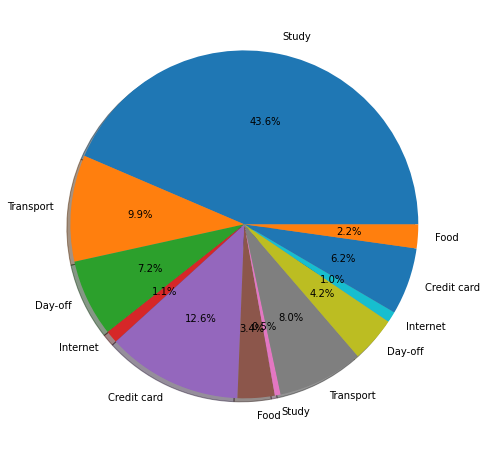

In [11]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.pie(spendings.Amount, labels = spendings.Source, autopct = '%1.1f%%', shadow=True);

# Composition

Note that our data shows the spendings of a person, and all spending can be summed to get the total spendings. Here, we have a **composition**. The pie plot is only one way of visualizing this data. Let's see some others. 

## Bar plot

Since we have too many categories, the pie plot is very bad, as we are not able to distinguish which spendings go for 2017 ou 2018. Thus, for that end, let's try to draw a bar plot:

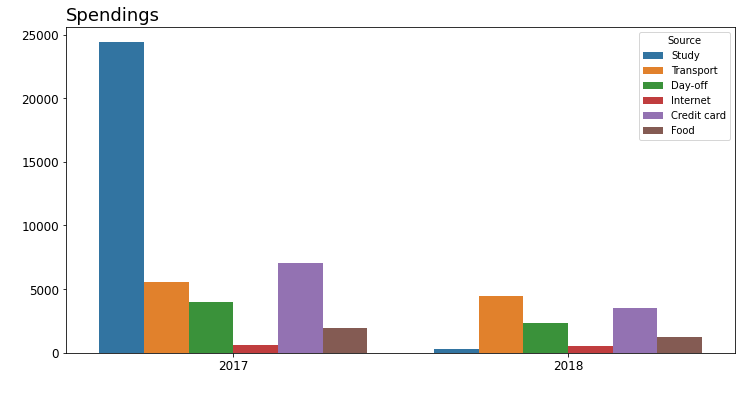

In [12]:
import seaborn as sns

ax = sns.barplot(y = 'Amount', x = 'Year', hue = 'Source', data = spendings)

ax.set_title("Spendings", fontsize = 18, loc = 'left')                                         # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(12, 6)                                                               # Changing the size of our graph

Nice! Note that, using the hue parameter, we were able to define two different sets of values! Now, our data is separed by years, with different hues for differente sources.

Ok! Now, let's get another dataset, which says the spendings month by month:

In [13]:
dataset = pd.read_csv('month_spendings.csv', sep = ';')
dataset

,Month,Study,Transport,Day-off,Internet,Credit_card,Food
0,Jan,2000,500,230,50,900,260
1,Fev,2300,520,240,60,500,200
2,Mar,2300,550,260,55,200,180
3,Apr,2300,480,432,57,600,100
4,May,2300,460,430,56,600,100
5,Jun,2300,430,335,62,800,190
6,Jul,2000,500,276,65,900,160
7,Aug,2300,530,348,69,560,180
8,Sep,2300,520,564,68,700,189
9,Oct,2300,550,200,53,800,100


Now, we have too many months to use a bar plat with a hue. Here, we need to stack our bars so that we don't have an overcrowded plot. To stack our bars, we can use the plot function from Pandas:

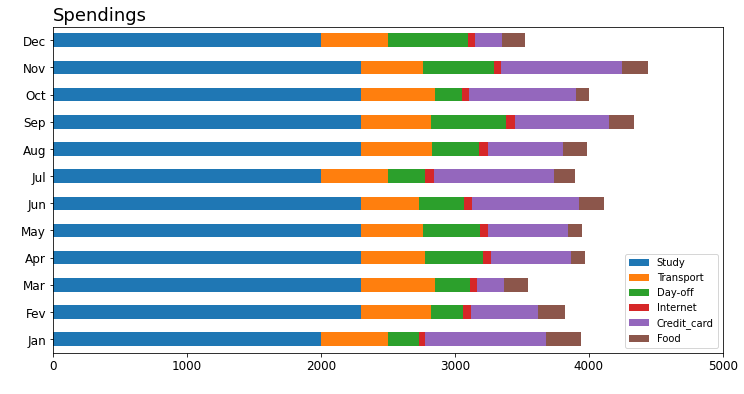

In [14]:
ax = dataset.set_index('Month').plot(kind='barh', stacked=True)

ax.set_title("Spendings", fontsize = 18, loc = 'left')                                         # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

ax.set_xlim([0, 5000])

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(12, 6)                                                               # Changing the size of our graph

## Line plot

Note that, even by stacking our bars, we still have a very crowded plot. If we had even more periods, we would be in trouble. Let's test other plots. First, let's go with a lineplot:

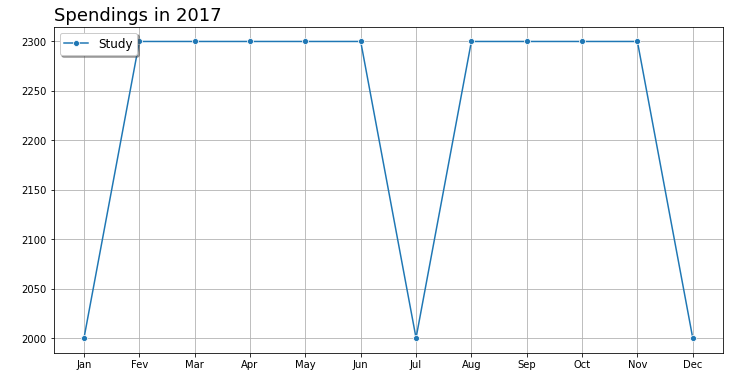

In [15]:
ax = sns.lineplot(x = 'Month', y = 'Study', data = dataset, marker='o', label = 'Study')

plt.grid()                                                          # Adding a grid

ax.set_title("Spendings in 2017", fontsize = 18, loc = 'left')      # Creating a title for our graph
ax.set_xlabel(" ")                                                  # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                  # Taking the ylabel out of our figure

ax.legend(loc = 'upper left', shadow = True, fontsize = 12)         # Adding a legend

ax.figure.set_size_inches(12, 6)                                    # Changing the size of our graph

Note that, here, we are only showing the spendings of one source (study). To show all spendings we need to do:

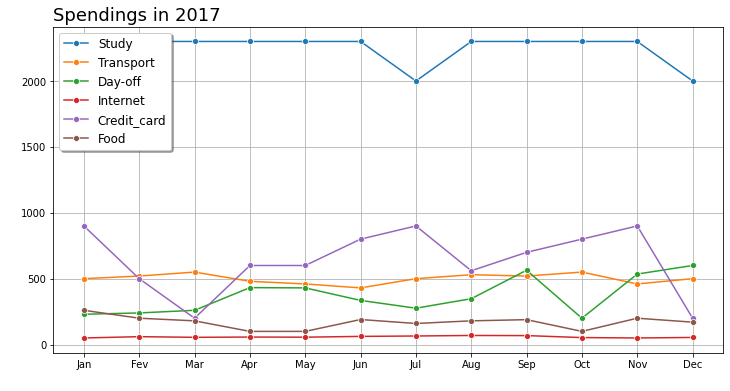

In [16]:
ax = sns.lineplot(x = 'Month', y = 'Study', data = dataset, marker='o', label = 'Study')
ax = sns.lineplot(x = 'Month', y = 'Transport', data = dataset, marker='o', label = 'Transport')
ax = sns.lineplot(x = 'Month', y = 'Day-off', data = dataset, marker='o', label = 'Day-off')
ax = sns.lineplot(x = 'Month', y = 'Internet', data = dataset, marker='o', label = 'Internet')
ax = sns.lineplot(x = 'Month', y = 'Credit_card', data = dataset, marker='o', label = 'Credit_card')
ax = sns.lineplot(x = 'Month', y = 'Food', data = dataset, marker='o', label = 'Food')

plt.grid()                                                          # Adding a grid

ax.set_title("Spendings in 2017", fontsize = 18, loc = 'left')      # Creating a title for our graph
ax.set_xlabel(" ")                                                  # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                  # Taking the ylabel out of our figure

ax.legend(loc = 'upper left', shadow = True, fontsize = 12)         # Adding a legend

ax.figure.set_size_inches(12, 6)                                    # Changing the size of our graph

## Stacked plot

Using a line plot, it is still hard to understand what is going on with our data. Actually, the best option here is to use a stacked plot:

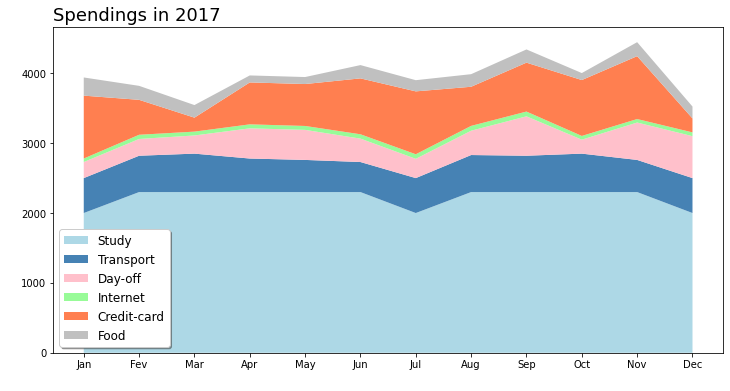

In [17]:
color_map = ['lightblue', 'steelblue', 'pink', 'palegreen', 'coral', 'silver']

fig = plt.figure(figsize = (12, 6))

plt.stackplot('Month', 'Study', 'Transport', 'Day-off', 'Internet', 'Credit_card', 'Food', data = dataset,
              labels=['Study', 'Transport', 'Day-off', 'Internet', 'Credit-card', 'Food'],
              colors = color_map)

plt.title("Spendings in 2017", fontsize = 18, loc = 'left')      # Creating a title for our graph
plt.xlabel(" ")                                                  # Taking the xlabel out of our figure
plt.ylabel(" ")                                                  # Taking the ylabel out of our figure

plt.legend(loc = 'lower left', shadow = True, fontsize = 12)         # Adding a legend

# Comparison

In some cases, however, we do not have a composition, but rather a comparison. For instance, using our data, let's say that we actually want to compare the spendings for Credit card and Food. A stacked plot is a very bad way of comparing such data.



## Bar plot

Thus, for that end, we showed try to use a normal non-stacked bar plot:

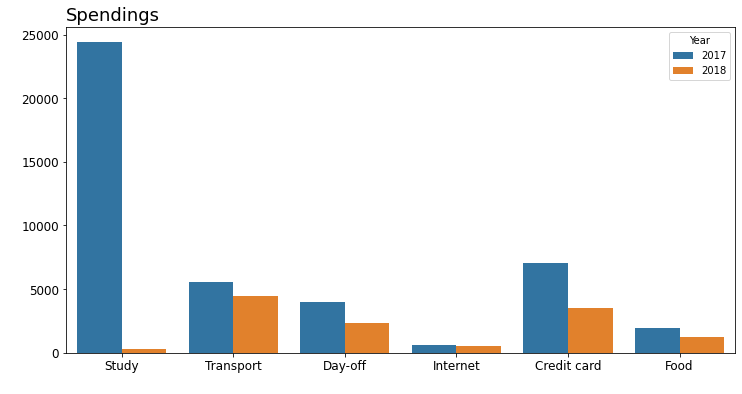

In [18]:
ax = sns.barplot(y = 'Amount', x = 'Source', hue = 'Year', data = spendings)

ax.set_title("Spendings", fontsize = 18, loc = 'left')                                         # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(12, 6)                                                               # Changing the size of our graph

Note that, here, we are comparing how the spendings of each source changed from 2017 to 2018. Thus, unstacked graphs help us to perform comparisons!

Now, let's try to perform a similar thing with our other dataset. First, let's organize our dataset:

In [19]:
Study = dataset.Month.to_frame( ); Study['Amount'] = dataset.Study; Study['Source'] = 'Study';

Transport = dataset.Month.to_frame( ); Transport['Amount'] = dataset.Transport; Transport['Source'] = 'Transport';

Dayoff = dataset.Month.to_frame( ); Dayoff['Amount'] = dataset['Day-off']; Dayoff['Source'] = 'Day-off';

Internet = dataset.Month.to_frame( ); Internet['Amount'] = dataset.Internet; Internet['Source'] = 'Internet';

Credit_card = dataset.Month.to_frame( ); Credit_card['Amount'] = dataset.Credit_card; Credit_card['Source'] = 'Credit_card';

Food = dataset.Month.to_frame( ); Food['Amount'] = dataset.Food; Food['Source'] = 'Food';

dataset_new = Study.append(Transport).append(Dayoff).append(Internet).append(Credit_card).append(Food).reset_index(drop = True)

Now, let's see how spending in each source changed in the first six months:

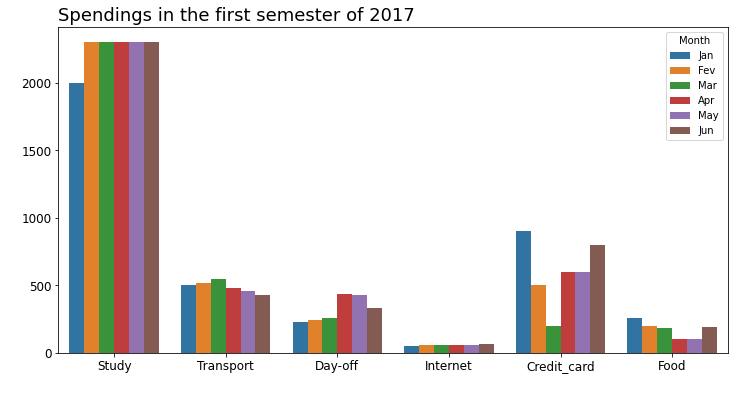

In [20]:
ax = sns.barplot(y = 'Amount', x = 'Source', hue = 'Month', data = dataset_new.query("Month in ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun']"))

ax.set_title("Spendings in the first semester of 2017", fontsize = 18, loc = 'left')           # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(12, 6)                                                               # Changing the size of our graph

Here, when we have multiple categories, it might be easier to identify differences when we change the orientation:

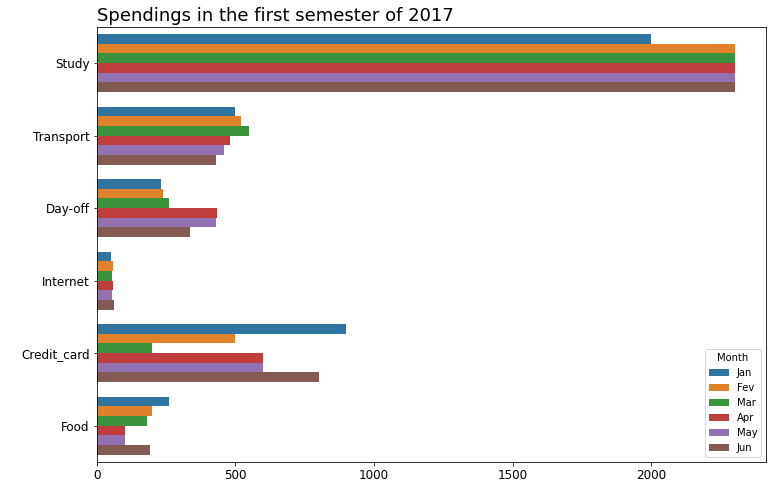

In [21]:
ax = sns.barplot(x = 'Amount', y = 'Source', hue = 'Month', data = dataset_new.query("Month in ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun']"))

ax.set_title("Spendings in the first semester of 2017", fontsize = 18, loc = 'left')           # Creating a title for our graph
ax.set_xlabel(" ")                                                                             # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                                             # Taking the ylabel out of our figure

plt.xticks(fontsize=12)                                                                        # Changing tick size
plt.yticks(fontsize=12)                                                                        # Changing tick size

ax.figure.set_size_inches(12, 8)                                                               # Changing the size of our graph

So, we are still able to compare our months but, as we increase the number of months and categories, our bar plot becomes harder to understand. 

## Line plot

When we want to compare our spendings, a line plot actually allows us to do this:

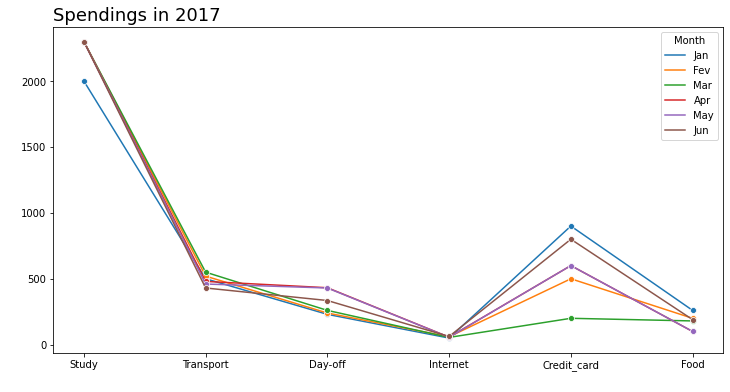

In [22]:
ax = sns.lineplot(x = 'Source', y = 'Amount', hue = 'Month', data = dataset_new.query("Month in ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun']"), marker='o')

ax.set_title("Spendings in 2017", fontsize = 18, loc = 'left')      # Creating a title for our graph
ax.set_xlabel(" ")                                                  # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                  # Taking the ylabel out of our figure

ax.figure.set_size_inches(12, 6)                                    # Changing the size of our graph

Nice! Here, we can have a better sense of how our data varies for different sources in each month. We can also draw this as a time series, by using the Month in the $x$-axis.

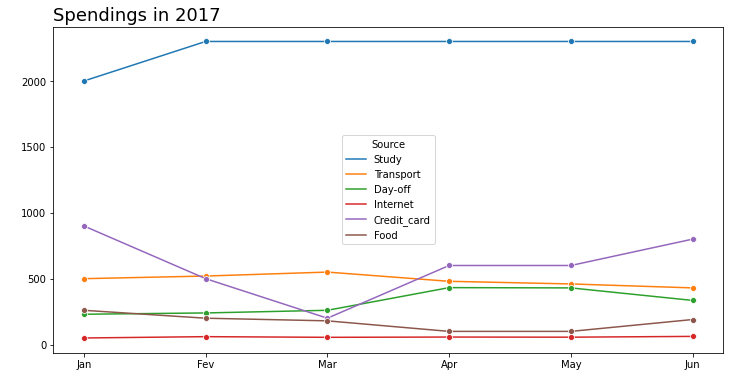

In [23]:
ax = sns.lineplot(x = 'Month', y = 'Amount', hue = 'Source', data = dataset_new.query("Month in ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun']"), marker='o')

ax.set_title("Spendings in 2017", fontsize = 18, loc = 'left')      # Creating a title for our graph
ax.set_xlabel(" ")                                                  # Taking the xlabel out of our figure
ax.set_ylabel(" ")                                                  # Taking the ylabel out of our figure

ax.figure.set_size_inches(12, 6)                                    # Changing the size of our graph

# Relationship between two variables

Another thing we may want to pass using a graph is the relationship between two different variables. For instance, let's use a new dataset, which stores the temperature and the number of ice creams sold:

In [24]:
sell_icecream_dict = {"Temperature" : [14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2],
                      "Ice cream"   : [215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408]}

sell_icecream = pd.DataFrame(sell_icecream_dict)
sell_icecream 

,Temperature,Ice cream
0,14.2,215
1,16.4,325
2,11.9,185
3,15.2,332
4,18.5,406
5,22.1,522
6,19.4,412
7,25.1,614
8,23.4,544
9,18.1,421


## Scatter plot

So, here, we want to understand how is the change in temperature related to the change in ice cream demand. In this case, a good choice is to use a scatter plot:

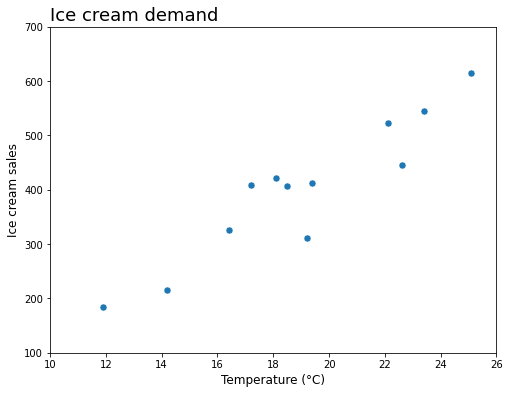

In [59]:
ax = sns.scatterplot(x = 'Temperature', y = 'Ice cream', data = sell_icecream, s = 50)

ax.set_title("Ice cream demand", fontsize = 18, loc = 'left')       # Creating a title for our graph
ax.set_ylabel("Ice cream sales", fontsize = 12)                     # Defining a ylabel
ax.set_xlabel("Temperature (°C)", fontsize = 12)                    # Defining a xlabel

ax.set_xlim([10, 26])
ax.set_ylim([100, 700])

ax.figure.set_size_inches(8, 6)                                    # Changing the size of our graph

Using a scatter plot, we are able to understand the relation between two variables, each in one axis. As the temperature increases, we **tend to** increase the number of ice cream sales. 

### Working with more than two dimensions

Note that we can also plot a scatter plot for three values. For that end, we need to use a 3D graph using the matplotlib library. First, let's redefine our dataframe:

In [50]:
sell_icecream_dict = {"Temperature" : [31.2, 30.1, 25.1, 23.4, 22.6, 22.1, 19.4, 19.2, 18.5, 18.1, 17.2, 16.4, 13.2, 14.2, 11.9],
                      "Ice cream"   : [560, 583, 614, 544, 445, 522, 412, 312, 406, 421, 408, 325, 732, 215, 185],
                      "Workers"     : [9, 7, 8, 10, 9, 10, 13, 7, 17, 5, 11, 20, 14, 16, 28]}

sell_icecream = pd.DataFrame(sell_icecream_dict)
sell_icecream 

,Temperature,Ice cream,Workers
0,31.2,560,9
1,30.1,583,7
2,25.1,614,8
3,23.4,544,10
4,22.6,445,9
5,22.1,522,10
6,19.4,412,13
7,19.2,312,7
8,18.5,406,17
9,18.1,421,5


Ok! Now, to introduce a third variable to the plot, we can change the size of each marker. We can do this by:

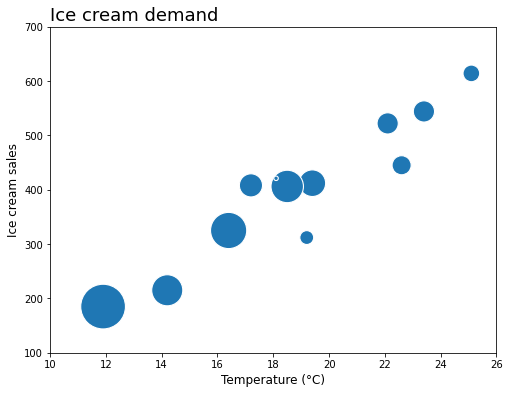

In [60]:
ax = sns.scatterplot(x = 'Temperature', y = 'Ice cream', size = "Workers", data = sell_icecream, sizes=(20, 2000), legend = False)

ax.set_title("Ice cream demand", fontsize = 18, loc = 'left')       # Creating a title for our graph
ax.set_ylabel("Ice cream sales", fontsize = 12)                     # Defining a ylabel
ax.set_xlabel("Temperature (°C)", fontsize = 12)                    # Defining a xlabel

ax.set_xlim([10, 26])
ax.set_ylim([100, 700])

ax.figure.set_size_inches(8, 6)                                    # Changing the size of our graph

Nice! Now, we are able to add a third feature to our plot. Note that, in some cases, we have a lot of workers and a very low demand, while in others we have fewer workers and a higher demand. It seems that the temperature is a better feature to explain ice cream demand.

The size option is good when we have a new numeric feature to introduce to our plot. When our new feature is categorical, we have other options, such as hue or style:

In [61]:
sell_icecream['City'] = ['RJ', 'RJ', 'RJ', 'RJ', 'RJ', 'SP', 'SP', 'SP', 'SP', 'SP', 'PR', 'PR', 'PR', 'PR', 'PR']

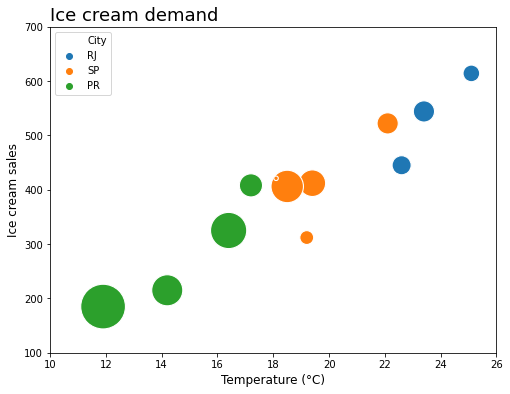

In [69]:
ax = sns.scatterplot(x = 'Temperature', y = 'Ice cream', size = "Workers", hue = 'City', data = sell_icecream, sizes=(20, 2000))

ax.set_title("Ice cream demand", fontsize = 18, loc = 'left')       # Creating a title for our graph
ax.set_ylabel("Ice cream sales", fontsize = 12)                     # Defining a ylabel
ax.set_xlabel("Temperature (°C)", fontsize = 12)                    # Defining a xlabel

ax.set_xlim([10, 26])
ax.set_ylim([100, 700])

ax.figure.set_size_inches(8, 6)   

h,l = ax.get_legend_handles_labels()
plt.legend(h[0:4],l[0:4])

or, by style:

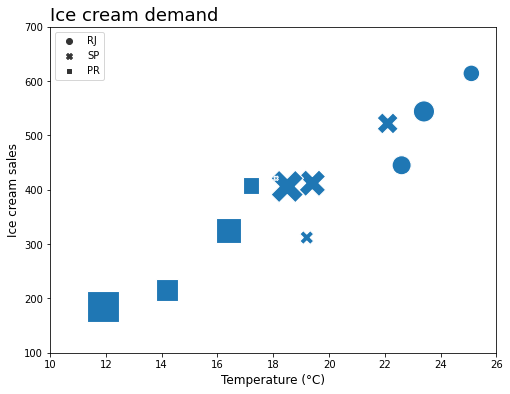

In [73]:
ax = sns.scatterplot(x = 'Temperature', y = 'Ice cream', size = "Workers", style = 'City', data = sell_icecream, sizes=(20, 2000))

ax.set_title("Ice cream demand", fontsize = 18, loc = 'left')       # Creating a title for our graph
ax.set_ylabel("Ice cream sales", fontsize = 12)                     # Defining a ylabel
ax.set_xlabel("Temperature (°C)", fontsize = 12)                    # Defining a xlabel

ax.set_xlim([10, 26])
ax.set_ylim([100, 700])

ax.figure.set_size_inches(8, 6)    

h,l = ax.get_legend_handles_labels()
plt.legend(h[-3:],l[-3:])

Note that we could consider both style and hue in our plot. However, as we introduce more features, we make our graph harder to understand. Also, note that we have changed our legend so that it does not show the legend for the sizes. This could make our legend too crowded.

# Frequency distribution

Another thing we might want to visualize is: how is the frequency distribution of our data? What is our mean and median values? Do we have a lot of observations that differ from these points? 

We have a couple of graphs that can help us in this task. First, let's define our dataset:

In [76]:
grades = pd.read_csv('grades.csv')
grades.head( )

,Notas
0,10.0
1,10.0
2,10.0
3,9.0
4,9.0


Our new dataset has only one column, with the grade from 30 students:

In [77]:
grades.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Notas   30 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


To understand how this data is distributed, we can use a histogram:

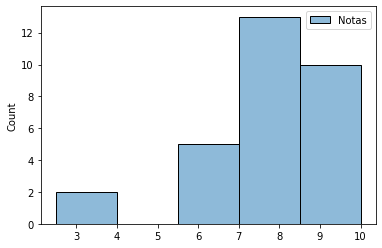

In [83]:
sns.histplot(grades, bins = 5)

ax.set_title("Histogram for the grades", fontsize = 18, loc = 'left')       # Creating a title for our graph
ax.set_ylabel("Count", fontsize = 12)                                       # Defining a ylabel
ax.set_xlabel("Grades", fontsize = 12)                                      # Defining a xlabel

ax.figure.set_size_inches(12, 8)    

Note that the histogram shows how data is distributed. For instance, between 7 and 8.5, we have 13 grades. Note that the bin limit is not good. We can adjust these using:

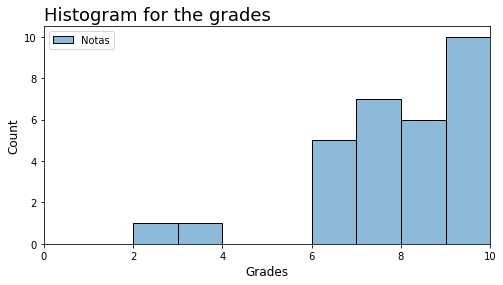

In [90]:
ax = sns.histplot(grades, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

ax.set_title("Histogram for the grades", fontsize = 18, loc = 'left')       # Creating a title for our graph
ax.set_ylabel("Count", fontsize = 12)                                       # Defining a ylabel
ax.set_xlabel("Grades", fontsize = 12)                                      # Defining a xlabel

ax.set_xlim([0, 10])

ax.figure.set_size_inches(8, 4)    

Nice! Now, we can see, for instance, that, between 7 and 8, we have 7 students! And most of our students scored between 9 and 10! Nice!

And how can we use a histogram to understand the relationship between the distribution of two variables? First, let's get our new data:

In [93]:
students = pd.read_csv('students.csv', sep = ';')
students.head( )

,Notas,Horas de estudo
0,10.0,20.0
1,10.0,19.0
2,10.0,18.0
3,9.0,19.8
4,9.0,19.9


Now, we have both the students grades and hours of study. We can use a scatter plot to understand how these variables are related:

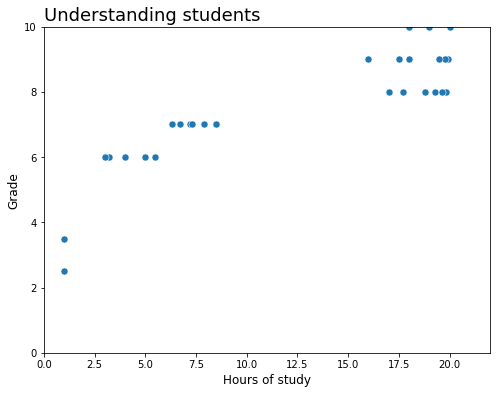

In [96]:
ax = sns.scatterplot(x = 'Horas de estudo', y = 'Notas', data = students, s = 50)

ax.set_title("Understanding students", fontsize = 18, loc = 'left')              # Creating a title for our graph
ax.set_xlabel("Hours of study", fontsize = 12)                                   # Defining a ylabel
ax.set_ylabel("Grade", fontsize = 12)                                            # Defining a xlabel

ax.set_xlim([0, 22])
ax.set_ylim([0, 10])

ax.figure.set_size_inches(8, 6)                                                  # Changing the size of our graph

Ok, we are able to see that there is a relation between house of study and grades. Let's see the histogram for each variable:

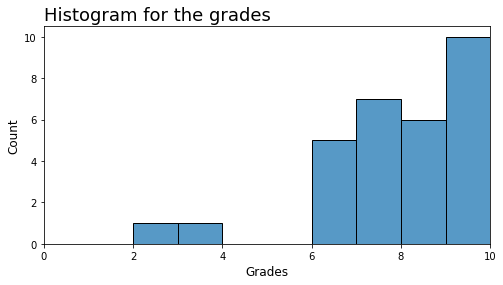

In [102]:
ax = sns.histplot(students['Notas'], bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

ax.set_title("Histogram for the grades", fontsize = 18, loc = 'left')       # Creating a title for our graph
ax.set_ylabel("Count", fontsize = 12)                                       # Defining a ylabel
ax.set_xlabel("Grades", fontsize = 12)                                      # Defining a xlabel

ax.set_xlim([0, 10])

ax.figure.set_size_inches(8, 4)    

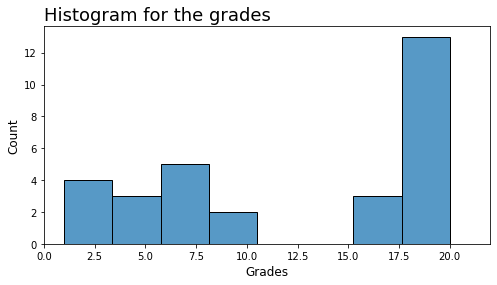

In [103]:
ax = sns.histplot(students['Horas de estudo'], bins = 8)

ax.set_title("Histogram for the hours of study", fontsize = 18, loc = 'left')    # Creating a title for our graph
ax.set_ylabel("Count", fontsize = 12)                                            # Defining a ylabel
ax.set_xlabel("Grades", fontsize = 12)                                           # Defining a xlabel

ax.set_xlim([0, 22])

ax.figure.set_size_inches(8, 4)     

To join these three graphs, we can use a joint plot:

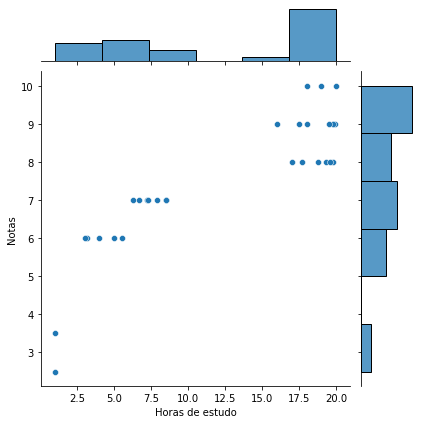

In [104]:
ax = sns.jointplot(x = 'Horas de estudo', y = 'Notas', data = students)

Nice! This graph allows use to see the scatter plot and the histogram for the two variables at the same time!

# Gestalt principles

Note that, by visualizing our graph, we can follow some principles to make inferences from it. For instance, let's see again our scatter plot:

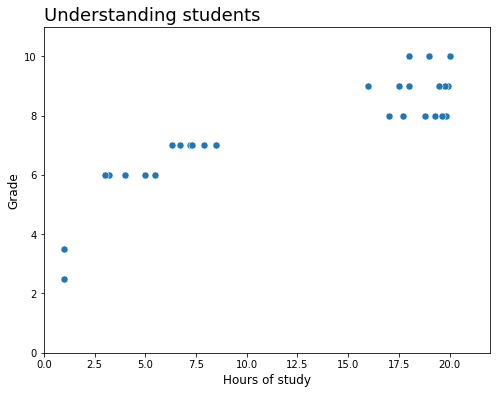

In [106]:
ax = sns.scatterplot(x = 'Horas de estudo', y = 'Notas', data = students, s = 50)

ax.set_title("Understanding students", fontsize = 18, loc = 'left')              # Creating a title for our graph
ax.set_xlabel("Hours of study", fontsize = 12)                                   # Defining a ylabel
ax.set_ylabel("Grade", fontsize = 12)                                            # Defining a xlabel

ax.set_xlim([0, 22])
ax.set_ylim([0, 11])

ax.figure.set_size_inches(8, 6)                                                  # Changing the size of our graph

Note that, looking at this plot, we see some clear groups. We form these groups in our head by the **proximity** between them. When we have clear groups in our data, we have to be worried to not pass the idea of groups when, in reality, we have no group at all.

When we have groups, an interesting idea is to use their **similarity** to pass the idea of groups, along with proximity. Thus, we can do something such as: 



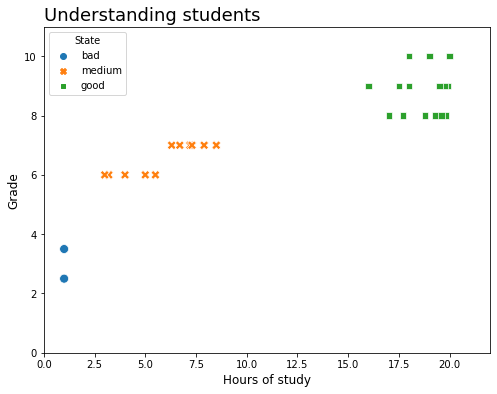

In [112]:
students['State'] = pd.cut(students.Notas, [0, 4, 7.5, 10], labels=["bad", "medium", "good"])

ax = sns.scatterplot(x = 'Horas de estudo', y = 'Notas', hue = 'State', style = 'State', data = students, s = 80)

ax.set_title("Understanding students", fontsize = 18, loc = 'left')              # Creating a title for our graph
ax.set_xlabel("Hours of study", fontsize = 12)                                   # Defining a ylabel
ax.set_ylabel("Grade", fontsize = 12)                                            # Defining a xlabel

ax.set_xlim([0, 22])
ax.set_ylim([0, 11])

ax.figure.set_size_inches(8, 6)                                                  # Changing the size of our graph

Nice! Now, we have changed the color for each group, and they are highlighted using colors and also different stiles.

# Summary

We can se a summary of chart suggestions in:

https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf